In [0]:
import numpy as np
import gym
import copy
env = gym.make("FrozenLake-v0", is_slippery=False)

gamma = 0.9 # gamma é o desconto 

In [2]:
estado = 0 #numero de 0 a 15
ação = 0 # numero de 0 a 3
env.P[estado][ação] # = {(probability, nextstate, reward, done), ...}

[(1.0, 0, 0.0, False)]

In [0]:
def policy_evaluation_v0(env, politica, gamma, delta_min):

    função_valor = [0] * env.nS # Número de estados
    while True:
        delta = 0
        for estado in range(env.nS):
            v_antigo = função_valor[estado]
            função_valor[estado] = sum(politica[estado][acao] * prob * (r + gamma * função_valor[estado_seguinte])
                                          for acao in range(env.nA)
                                          for prob, estado_seguinte, r, done in env.P[estado][acao])
            delta = max(delta, abs(função_valor[estado] - v_antigo))
        if delta < delta_min:
            break
    return função_valor

In [0]:
def policy_evaluation_v1(env, gamma, erro_min):
    função_valor = [0] * env.nS # Número de estados
    while True:
        erro = 0
        for estado in range(env.nS):
            valor_ação = [0] * env.nA
            for ação in range(env.nA):
                valor_ação[ação] = sum(prob * (r + gamma * função_valor[estado_seguinte])
                                          for prob, estado_seguinte, r, done in env.P[estado][ação])
            valor_antigo = função_valor[estado]
            função_valor[estado] = max(valor_ação)
            erro = max(erro, abs(função_valor[estado] - valor_antigo))
        if erro < erro_min:
            break

    return função_valor
    

In [0]:
def policy_improvement(env, função_valor):

    politica = [[0]* env.nA for _ in range(env.nS)]
    for estado in range(env.nS):
        valor_ação = [0] * env.nA
        for acao in range(env.nA):
            valor_ação[acao] = sum(prob * (r + gamma * função_valor[estado_seguinte])
                       for prob, estado_seguinte, r, done in env.P[estado][acao])
        acao_gulosa = np.argmax(valor_ação) # retorna o índice da maior ação
        politica[estado][acao_gulosa] = 1
    return politica

In [0]:
def policy_iteration(env, gamma):
        
    politica = {s: [1/env.nA] * env.nA  # Política aleatória
              for s in range(env.nS)}
    politica_antiga = None
    while politica != politica_antiga:
        politica_antiga = copy.deepcopy(politica)
        função_valor = policy_evaluation_v0(env, politica, gamma, 1e-5)
        politica = policy_improvement(env, função_valor)
    return função_valor, politica

In [0]:
def value_iteration(env, gamma):    

    função_valor = policy_evaluation_v1(env, gamma, 1e-5)
    politica = policy_improvement(env, função_valor)
    return função_valor, politica

In [0]:
def print_value_function(v):
    """    
    Argumentos:
        v: uma lista de valores de cada estado
    """
    for i in range(0, 16, 4): # Imprime o valor de cada estado
        print(' | '.join('{:.3f}'.format(x) for x in v[i:i+4]))
    

In [0]:
#Para visualizar a função valor 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

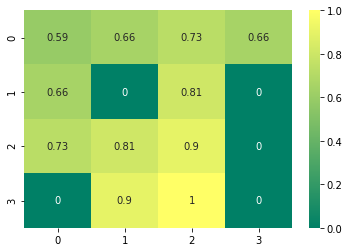

In [10]:
função_valor, politica = value_iteration(env, gamma)
v = [função_valor[0:4], 
     função_valor[4:8], 
     função_valor[8:12],
     função_valor[12:16]]

visualizavel = np.array(v)
sns.heatmap(visualizavel, annot=True, cmap='summer')
plt.show()

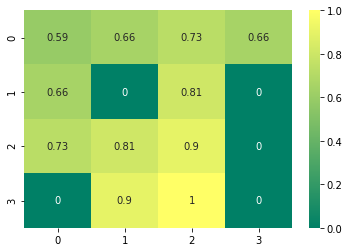

In [11]:
função_valor, politica = policy_iteration(env, gamma)

v = [função_valor[0:4], 
     função_valor[4:8], 
     função_valor[8:12],
     função_valor[12:16]]

visualizavel = np.array(v)
sns.heatmap(visualizavel, annot=True, cmap='summer')
plt.show()

In [0]:
# Para a simulação do ambiente
import time
from IPython.display import clear_output

In [13]:
estado = env.reset()
env.render()
while True:
    time.sleep(1)
    ação = np.argmax(politica[estado])
    estado, r, done, info = env.step(ação)
    clear_output(wait=True)
    env.render()
    if done:
        break

  (Right)
SFFF
FHFH
FFFH
HFFG
